<a href="https://colab.research.google.com/github/alfianpr/perhitungan-volume-objek-simetri/blob/main/Multiple_Linear_Regression_Telur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Menyiapkan Library yang digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

##Menyiapkan dan melihat data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alfianpr/perhitungan-volume-objek-simetri/main/telur_clean.csv', usecols=['pixel', 'volume', 'jarak'])
print('5 data teratas :')
print(df.head())
print('Jumlah kolom dan baris dari data :', df.shape)
print('informasi data :')
print(df.info())
print('data statistik :')
print(df.describe())

5 data teratas :
   pixel  volume  jarak
0  57378      60   30.7
1  53078      50   30.7
2  60613      60   30.7
3  53295      50   30.7
4  44062      40   30.7
Jumlah kolom dan baris dari data : (80, 3)
informasi data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pixel   80 non-null     int64  
 1   volume  80 non-null     int64  
 2   jarak   80 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 2.0 KB
None
data statistik :
              pixel    volume      jarak
count     80.000000  80.00000  80.000000
mean   54154.575000  54.00000  30.888750
std     4354.322278   6.23384   0.720934
min    44062.000000  40.00000  29.700000
25%    52074.000000  50.00000  30.700000
50%    53681.500000  55.00000  31.000000
75%    56909.000000  60.00000  31.600000
max    66614.000000  75.00000  31.600000


In [3]:
#Merubah tipe data yang semula float menjadi int.
df['jarak'] = df['jarak'].astype('int')

##Cek missing value

In [4]:
#Mencari dan menangani missing values
df.isnull().sum()

pixel     0
volume    0
jarak     0
dtype: int64

##Exploratory Data Analysis

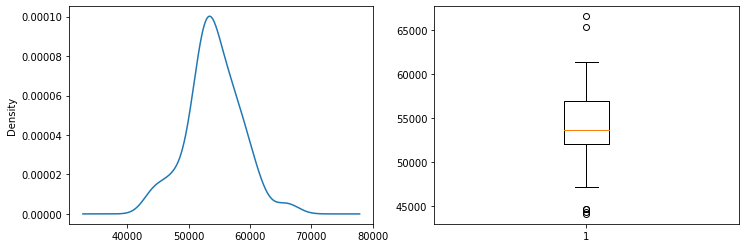

In [5]:
#Univariate analysis pixel

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['pixel'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['pixel'])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


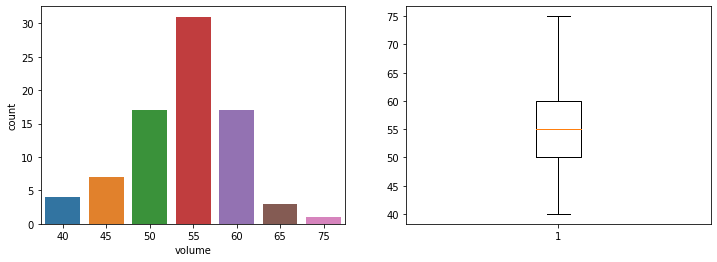

In [6]:
#Univariate analysis volume.

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['volume'])

f.add_subplot(1,2,2)
plt.boxplot(df['volume'])

plt.show()

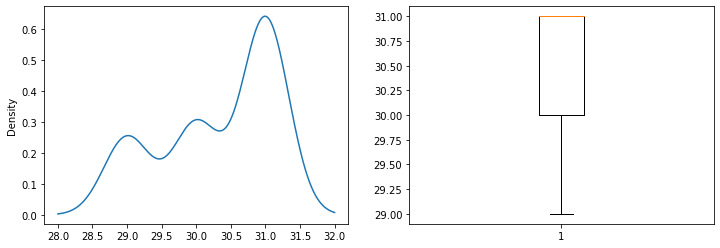

In [7]:
#Univariate analysis jarak

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['jarak'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['jarak'])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

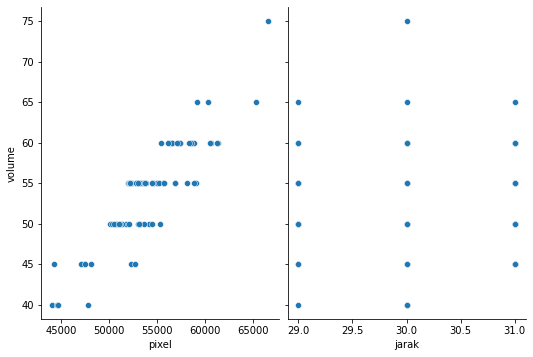

In [8]:
#Bivariate analysis antara independent variable dan dependent variable.

plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['pixel', 'jarak'], y_vars=['volume'], size=5, aspect=0.75)

In [9]:
#Mengetahui nilai korelasi dari independent variable dan dependent variable.

df.corr().style.background_gradient().set_precision(2)

,pixel,volume,jarak
pixel,1.00,0.89,-0.26
volume,0.89,1.00,0.10
jarak,-0.26,0.10,1.00


##Modelling dan melihat akurasi prediksi

In [10]:
#variabel x dan y.
x = df.drop(columns='volume')
y = df['volume']

#split data menjadi training and testing dengan porsi 80:20.
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=4)

#object linear regresi.
lin_reg = LinearRegression()

#train the model menggunakan training data yang sudah displit.
lin_reg.fit(x_train.values, y_train.values)

#nilai slope/koefisien (m) dan intercept (b).
print(lin_reg.coef_)
print(lin_reg.intercept_)

[1.40794837e-03 2.96410777e+00]
-112.22967557460129


## Uji akurasi machine learning
Didapat akurasi sebesar 91%

In [11]:
#Accuracy score dengan data test
lin_reg.score(x_test.values, y_test.values)

0.9103369771062961

##Prediksi

In [12]:
lin_reg.predict([[50000, 30]])

array([47.09097584])